# Personal Information






**Reema Abdullah Aldanish**.


# Part 1: Text Representation

Download the following dataset: [link text](https://www.kaggle.com/datasets/vigneshwarsofficial/reviews) Then add it to your drive so you can use it.

In [ ]:
import nltk
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import string
import re
#Import the files module from the google.colab package ..
from google.colab import files
#Upload kaggle.json ..
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d patelprashant/employee-attrition
!unzip employee-attrition.zip
df = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t')

Saving Restaurant_Reviews.tsv to Restaurant_Reviews (1).tsv
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/patelprashant/employee-attrition
License(s): other
employee-attrition.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  employee-attrition.zip
replace WA_Fn-UseC_-HR-Employee-Attrition.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

1.1	Use the CountVectorizer from scikit-learn to create a bag -of-words representation of the dataset.

In [ ]:
stemmer = PorterStemmer()
def clean_and_stem(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = ' '.join(text.split())
    stemmed_text = ' '.join([stemmer.stem(word) for word in text.split()])
    return stemmed_text
df['Cleaned_Review'] = df['Review'].apply(clean_and_stem)
def print_aggregated_then_individual_bow(df, column_name):
    vectorizer = CountVectorizer()
    #Fit and transform the data to a BoW representation ..
    vectorizer = CountVectorizer()
    BoW_matrix = vectorizer.fit_transform(df['Cleaned_Review'])
    feature_names = vectorizer.get_feature_names_out()
    BoW_array = BoW_matrix.toarray()
    total_counts = BoW_array.sum(axis=0)
    aggregated_counts = {feature_names[i]: total_counts[i] for i in range(len(feature_names))}
    print("Aggregated Bag of Words Representation:")
    print(aggregated_counts)
    #Print the BoW representation for each sentence ..
    print("\nIndividual Sentence BoW Representations:")
    for i, sentence in enumerate(df[column_name][:5]):
        sentence_bow = {feature_names[j]: BoW_array[i, j] for j in range(len(feature_names)) if BoW_array[i, j] > 0}
        print(f"Sentence: '{sentence}'\nBoW Representation: {sentence_bow}")
print_aggregated_then_individual_bow(df, 'Review')
vectorizer = CountVectorizer()
BoW_matrix = vectorizer.fit_transform(df['Cleaned_Review'])
feature_names = vectorizer.get_feature_names_out()
BoW_array = BoW_matrix.toarray()
total_counts = BoW_array.sum(axis=0)
aggregated_counts = {feature_names[i]: total_counts[i] for i in range(len(feature_names))}

Aggregated Bag of Words Representation:
{'about': 17, 'abov': 2, 'absolut': 9, 'absolutley': 1, 'accid': 1, 'accommod': 1, 'accomod': 1, 'accordingli': 1, 'account': 1, 'ach': 1, 'acknowledg': 2, 'across': 1, 'actual': 3, 'ad': 2, 'afford': 1, 'after': 12, 'afternoon': 1, 'again': 24, 'ago': 3, 'ahead': 1, 'airlin': 1, 'airport': 1, 'ala': 1, 'albondiga': 1, 'all': 43, 'allergi': 1, 'almond': 1, 'almost': 2, 'alon': 1, 'also': 27, 'although': 3, 'alway': 15, 'am': 6, 'amaz': 23, 'amazingrg': 1, 'ambianc': 7, 'ambienc': 3, 'amount': 3, 'ampl': 1, 'an': 32, 'and': 389, 'andddd': 1, 'angri': 1, 'ani': 12, 'anoth': 10, 'anticip': 1, 'anymor': 1, 'anyon': 2, 'anyth': 2, 'anytim': 5, 'anyway': 3, 'apart': 1, 'apolog': 2, 'app': 1, 'appal': 1, 'appar': 1, 'appeal': 1, 'appet': 3, 'appetit': 1, 'appl': 1, 'approv': 1, 'are': 63, 'area': 7, 'arent': 2, 'arepa': 1, 'aria': 1, 'around': 8, 'array': 1, 'arriv': 5, 'articl': 1, 'as': 36, 'ask': 10, 'assur': 2, 'at': 55, 'ate': 3, 'atmospher': 11, '

1.2	Encode each sample with one-hot-encoding.


In [ ]:
#Initialize OneHotEncoder ..
encoder = OneHotEncoder(sparse=False)
encoded_reviews = encoder.fit_transform(df['Review'].values.reshape(-1, 1))
vectorizer = CountVectorizer(binary=True)
one_hot_matrix = vectorizer.fit_transform(df['Review'])
#Display the vocabulary with IDs ..
print("Vocabulary with IDs:")
print(vectorizer.vocabulary_)
#Convert the one-hot encoded matrix to an array ..
one_hot_array = one_hot_matrix.toarray()
for i, vector in enumerate(one_hot_array[:5]):
    print(f"Sentence {i+1}: {df['Review'].iloc[i]}")
    print(f"One-hot encoded vector: {vector.tolist()}")

Vocabulary with IDs:
{'wow': 2012, 'loved': 1046, 'this': 1798, 'place': 1330, 'crust': 427, 'is': 943, 'not': 1195, 'good': 764, 'tasty': 1761, 'and': 64, 'the': 1780, 'texture': 1774, 'was': 1940, 'just': 967, 'nasty': 1169, 'stopped': 1699, 'by': 264, 'during': 557, 'late': 991, 'may': 1087, 'bank': 139, 'holiday': 867, 'off': 1208, 'rick': 1488, 'steve': 1691, 'recommendation': 1444, 'it': 945, 'selection': 1560, 'on': 1221, 'menu': 1110, 'great': 778, 'so': 1630, 'were': 1965, 'prices': 1374, 'now': 1198, 'am': 57, 'getting': 746, 'angry': 66, 'want': 1934, 'my': 1162, 'damn': 439, 'pho': 1316, 'honeslty': 870, 'didn': 484, 'taste': 1757, 'that': 1778, 'fresh': 713, 'potatoes': 1362, 'like': 1016, 'rubber': 1505, 'you': 2027, 'could': 396, 'tell': 1766, 'they': 1788, 'had': 805, 'been': 167, 'made': 1061, 'up': 1883, 'ahead': 44, 'of': 1207, 'time': 1809, 'being': 173, 'kept': 969, 'under': 1866, 'warmer': 1938, 'fries': 719, 'too': 1824, 'touch': 1833, 'service': 1573, 'very': 19

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1.3	Use the TfidfVectorizer from scikit-learn to create a TF-IDF representation of the dataset.

In [ ]:
def create_and_print_tfidf_for_all(df, column_name):
    tfidf_vectorizer = TfidfVectorizer()
    #Fit and transform the data to a TF-IDF representation ..
    tfidf_matrix = tfidf_vectorizer.fit_transform(df[column_name])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_array = tfidf_matrix.toarray()
    #Print TF-IDF values for each document ..
    for i in range(5):
        document_tfidf = {feature_names[j]: tfidf_array[i, j] for j in range(len(feature_names)) if tfidf_array[i, j] > 0}
        limited_document_tfidf = dict(list(document_tfidf.items())[:])
        print(f"Document {i + 1} TF-IDF Representation:")
        print(limited_document_tfidf)
        print("..." if len(document_tfidf) > 10 else "")
        print()
create_and_print_tfidf_for_all(df, 'Review')

Document 1 TF-IDF Representation:
{'loved': 0.5727163497116121, 'place': 0.33924917943793786, 'this': 0.31213680923998094, 'wow': 0.6778470250293764}


Document 2 TF-IDF Representation:
{'crust': 0.7796745379592049, 'good': 0.38776447225033034, 'is': 0.3302813425168802, 'not': 0.3642259788974013}


Document 3 TF-IDF Representation:
{'and': 0.16724341982474072, 'just': 0.3458367510034584, 'nasty': 0.5215222019267477, 'not': 0.25437540376667894, 'tasty': 0.4336794764651031, 'texture': 0.5215222019267477, 'the': 0.14370731947893803, 'was': 0.18713427787373044}


Document 4 TF-IDF Representation:
{'and': 0.09173368784273847, 'bank': 0.31645653635056953, 'by': 0.21129150039544384, 'during': 0.26827444843824244, 'holiday': 0.31645653635056953, 'it': 0.13076036861337076, 'late': 0.2986739612913253, 'loved': 0.24169101324852668, 'may': 0.26827444843824244, 'off': 0.245871053386107, 'recommendation': 0.2860570234974867, 'rick': 0.31645653635056953, 'steve': 0.31645653635056953, 'stopped': 0.298

1.4 Visualize the top 10 words in each class of the dataset

<ipython-input-9-e669c14d70fb>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(words_pos, rotation=45, ha='right')
<ipython-input-9-e669c14d70fb>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(words_neg, rotation=45, ha='right')


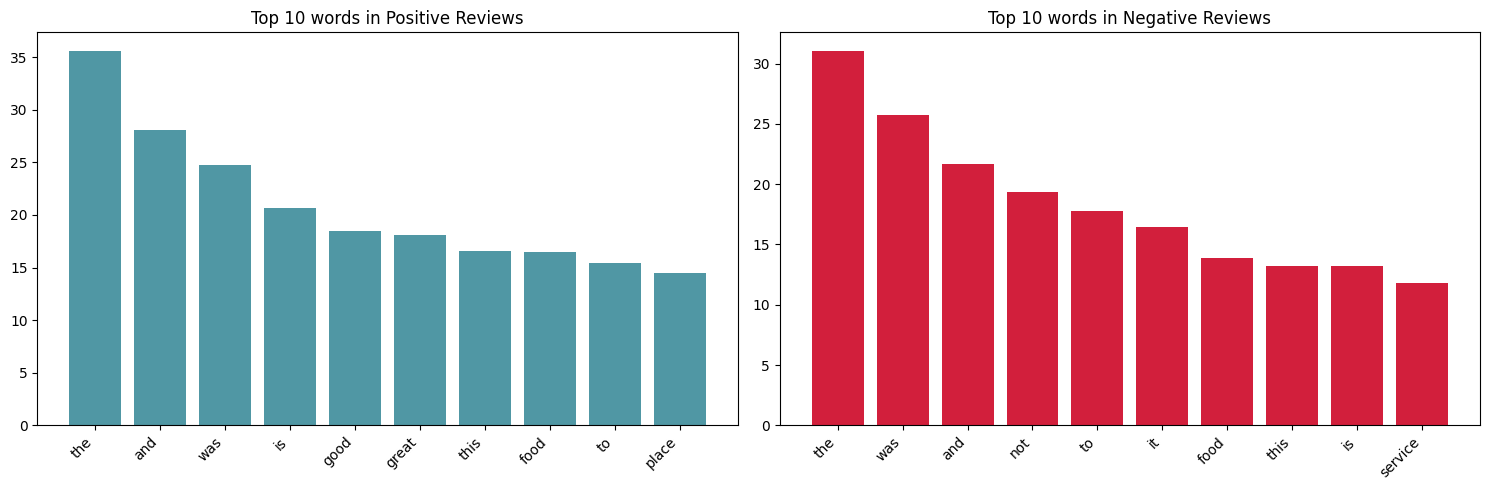

In [ ]:
def clean_text(text):
    text = text.lower()
    return text
df['Cleaned_Review'] = df['Review'].apply(clean_text)
#Initialize the TfidfVectorizer ..
vectorizer = TfidfVectorizer()
#Fit and transform the positive and negative reviews ..
positive_reviews = df[df['Liked'] == 1]['Cleaned_Review']
tfidf_matrix_pos = vectorizer.fit_transform(positive_reviews)
word_freq_pos = sorted(zip(vectorizer.get_feature_names_out(), tfidf_matrix_pos.sum(axis=0).A1), key=lambda x: x[1], reverse=True)[:10]
negative_reviews = df[df['Liked'] == 0]['Cleaned_Review']
tfidf_matrix_neg = vectorizer.fit_transform(negative_reviews)
word_freq_neg = sorted(zip(vectorizer.get_feature_names_out(), tfidf_matrix_neg.sum(axis=0).A1), key=lambda x: x[1], reverse=True)[:10]
words_pos, values_pos = zip(*word_freq_pos)
words_neg, values_neg = zip(*word_freq_neg)
#Plotting ..
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.bar(words_pos, values_pos, color='#5097A4')
ax1.set_title('Top 10 words in Positive Reviews')
ax1.set_xticklabels(words_pos, rotation=45, ha='right')
ax2.bar(words_neg, values_neg, color='#D21F3C')
ax2.set_title('Top 10 words in Negative Reviews')
ax2.set_xticklabels(words_neg, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Part 2: Sentiment Analysis using different classifiers

**1.1 Naive Bayes Classifier**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re
def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    return text
df['Processed_Review'] = df['Review'].apply(preprocess_text)
#Initialize vectorizers ..
cv = CountVectorizer(max_features=1500)
tfidf_vectorizer = TfidfVectorizer(max_features=1500)
#Initialize classifiers ..
nb_classifier = MultinomialNB()
logreg_classifier = LogisticRegression(max_iter=200)
#Define function to train and evaluate models ..
def train_and_evaluate(classifier, vectorizer, data_frame):
    X = vectorizer.fit_transform(data_frame['Processed_Review']).toarray()
    y = data_frame['Liked'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    #Evaluate the classifier ..
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    return accuracy, conf_matrix, class_report
nb_bow_accuracy, nb_bow_conf_matrix, nb_bow_class_report = train_and_evaluate(nb_classifier, cv, df)
nb_tfidf_accuracy, nb_tfidf_conf_matrix, nb_tfidf_class_report = train_and_evaluate(nb_classifier, tfidf_vectorizer, df)
logreg_bow_accuracy, logreg_bow_conf_matrix, logreg_bow_class_report = train_and_evaluate(logreg_classifier, cv, df)
logreg_tfidf_accuracy, logreg_tfidf_conf_matrix, logreg_tfidf_class_report = train_and_evaluate(logreg_classifier, tfidf_vectorizer, df)
print("Naive Bayes with BoW Results:")
print(f"Accuracy: {nb_bow_accuracy}")
print(f"Confusion Matrix:\n{nb_bow_conf_matrix}")
print(f"Classification Report:\n{nb_bow_class_report}\n")
print("Naive Bayes with TF-IDF Results:")
print(f"Accuracy: {nb_tfidf_accuracy}")
print(f"Confusion Matrix:\n{nb_tfidf_conf_matrix}")
print(f"Classification Report:\n{nb_tfidf_class_report}\n")

Naive Bayes with BoW Results:
Accuracy: 0.815
Confusion Matrix:
[[79 18]
 [19 84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        97
           1       0.82      0.82      0.82       103

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.82      0.81      0.82       200


Naive Bayes with TF-IDF Results:
Accuracy: 0.785
Confusion Matrix:
[[77 20]
 [23 80]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        97
           1       0.80      0.78      0.79       103

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.79       200




**1.2 Logistic Regression Classifier**

In [ ]:
def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    return text
df['Processed_Review'] = df['Review'].apply(preprocess_text)
y = df['Liked'].values
#Initialize Logistic Regression model ..
model = LogisticRegression(max_iter=200)
#Initialize vectorizers ..
vectorizers = {
    'BoW': CountVectorizer(max_features=1500),
    'TF-IDF': TfidfVectorizer(max_features=1500)
}
for vectorizer_name, vectorizer in vectorizers.items():
    X = vectorizer.fit_transform(df['Processed_Review']).toarray()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print(f"Logistic Regression with {vectorizer_name} Results:")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}\n")

Logistic Regression with BoW Results:
Accuracy: 0.825
Confusion Matrix:
[[82 15]
 [20 83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        97
           1       0.85      0.81      0.83       103

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200


Logistic Regression with TF-IDF Results:
Accuracy: 0.82
Confusion Matrix:
[[84 13]
 [23 80]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.82        97
           1       0.86      0.78      0.82       103

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200




1.6 Discuss the results and write your insights about the difference

In [ ]:
data = {
    'Classifier': ['Naive Bayes', 'Naive Bayes', 'Logistic Regression', 'Logistic Regression'],
    'Representation': ['BoW', 'TF-IDF', 'BoW', 'TF-IDF'],
    'Accuracy': [0.815, 0.785, 0.825, 0.82],
    'Precision': [0.82, 0.79, 0.83, 0.82],
    'Recall': [0.81, 0.79, 0.82, 0.82],
    'F1-Score': [0.82, 0.79, 0.83, 0.82]
}
df = pd.DataFrame(data)
df

,Classifier,Representation,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,BoW,0.815,0.82,0.81,0.82
1,Naive Bayes,TF-IDF,0.785,0.79,0.79,0.79
2,Logistic Regression,BoW,0.825,0.83,0.82,0.83
3,Logistic Regression,TF-IDF,0.820,0.82,0.82,0.82


- Naive Bayes with BOW: Works well because it relies on word frequency. Simple and effective for text classification, but may not always capture the importance of word context.
- Naive Bayes with TF-IDF: May underperform compared to BOW since it downplays common words, which could still be important for Naive Bayes' probability estimates.
- Logistic Regression with BOW: Handles complex relationships better than Naive Bayes. Doesn't assume independence, so it's good at using the raw counts in BOW for prediction.
- Logistic Regression with TF-IDF: Benefits from the nuanced word importance provided by TF-IDF, making it adept at distinguishing relevant words, especially in varied texts.

In short, Logistic Regression tends to outperform Naive Bayes when used with either BOW or TF-IDF, as it can better handle the complexities and interdependencies of word features in text data.